# Sect 25-Pt 1: Intro to Logistic Regression 

- online-ds-pt-041320
- 08/28/20

## Questions?

[Gdoc](https://docs.google.com/document/d/196yIMNSRSRspBdBmjHq7vMhFF-YdpvkyYEHYV5nm8xg/edit#)

## Announcements

- **Sect 25 will be split into 2 study groups.**
- Sect 26 doesn't introduce much/anything new
    - It revisits gradient descent and applies it to Logistic Regression.
    - **We will discuss** some of the concepts re-introduced next study group.
    - **We will NOT have an entire study group** dedicated to section 26


- **You will want/need to update matplotlib and scikit-learn** ( See IMPORTANT NOTE ABOUT PACKAGE VERSIONS)
   

## Topics in Sect 25

- For Today:
    - Supervised vs Unsupervised Learning
    - Logistic Regression - Theory
    - Applying Logistic Regression with `statsmodels`
    - Evaluating Classifiers
        - Accuracy, Precision, Recall, F1-Score
        - Confusion Matrices


- For Next Class:
    - Logistic Regression with `scikit-learn`
    - Evaluating Classifiers:
        - ROC-AUC curve
    - Class Imbalance Problems

## IMPORTANT NOTE ABOUT PACKAGE VERSIONS

### scikit-learn

In [16]:
## Run COnda List to Verify what versions are installed and how
%conda list scikit-learn

# packages in environment at /opt/anaconda3/envs/learn-env:
#
# Name                    Version                   Build  Channel
scikit-learn              0.23.2           py36h637a150_0    conda-forge

Note: you may need to restart the kernel to use updated packages.


- You will need sklearn to be version 0.23 + to have all of the tools covered in lessons.
    > Note: sklearn is listed as `scikit-learn`<br>to update: 
    `conda update scikit-learn`
 

In [ ]:
# %conda update scikit-learn

### Matplotlib

In [17]:
%conda list matplotlib

# packages in environment at /opt/anaconda3/envs/learn-env:
#
# Name                    Version                   Build  Channel
matplotlib                3.3.1                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


- You will want to update matplotlib to fix errors with your confusion matrix plots
    > `pip install -U matplotlib`

In [ ]:
# !pip install -U matplotlib

# Types of Machine Learning Models

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/ai_machine_learning_deep_learning.png">

## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png" width=60%>

# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/jirvingphd/online-dtsc-pt-041320-cohort-notes/master/assets/images/logistic_vs_linear.jpg">

## How is it used?

### Linear Regression

Trying to find the **relationship** and predict a specific value.

- Examples of regressions:
    - House prices
    - Salary
    - Reviews/Ratings

### Classification

Trying to identify what features can predict which class a particular observation/row belongs to.
- Can be a "binary classification" 
    - "yes" or "no"
    - Survived or died.
    - Diabetic or not-diabetic
- Can also be a "multiclass classification"
    - Which type of flower?
    - Will a football game end one team winning, or the other team, or a tie?


## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

- Output is specifying the **predicted value** for the target

## Classification: Use Logistic Regression

- Output is specifying the **probability** of belonging to a particular group

- Visual Example:
    - https://www.desmos.com/calculator/y2ilpxiqys

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

## Predict Passenger Survival on Titanic - `statsmodels`

In [2]:
# !pip install -U fsds
from fsds.imports import *
import statsmodels.api as sm

fsds v0.2.23 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
df = df[relevant_columns]
df.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked,Survived
0,3,22.0,1,7.2500,male,S,0
1,1,38.0,1,71.2833,female,C,1
2,3,26.0,0,7.9250,female,S,1
3,1,35.0,1,53.1000,female,S,1
4,3,35.0,0,8.0500,male,S,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    842 non-null    float64
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 55.7+ KB


In [19]:
# Recast Number Cols
df['Pclass'] = pd.to_numeric(df['Pclass'],errors='coerce')

In [20]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

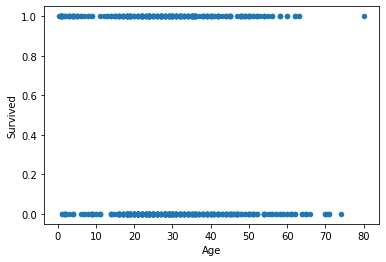

In [21]:
df.plot('Age','Survived',kind='scatter');

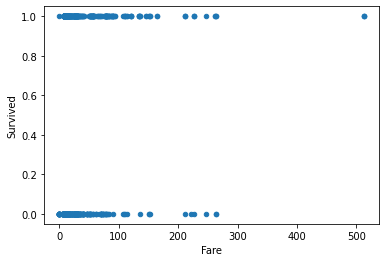

In [22]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe apply today)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**

- Train-test-split


### Preprocessing

In [23]:
## Null Values
df.isna().sum() / len(df)

Pclass      0.054994
Age         0.198653
SibSp       0.000000
Fare        0.000000
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [24]:
target = 'Survived'
X = df.drop(columns=target)
y = df[target]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_test.shape

((668, 6), (223,))

In [12]:
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [13]:
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [14]:
X_train.isna().sum()

Pclass       35
Age         146
SibSp         0
Fare          0
Sex           0
Embarked      2
dtype: int64

```python
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')

imputer_cat = SimpleImputer(strategy='most_frequent')#,fill_value='missing')

X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer_num.transform(X_test[num_cols])

X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

# df['Age'] = imputer.fit_transform(df[['Age']])
```

In [83]:
X_train.isna().any(axis=1)

494    False
615    False
702    False
263    False
530    False
       ...  
642    False
606    False
281    False
326    False
794    False
Length: 498, dtype: bool

In [26]:
train_nulls = X_train.isna().any(axis=1)
test_nulls = X_test.isna().any(axis=1)
train_nulls

494    False
300     True
615    False
702    False
263    False
       ...  
642    False
606    False
281    False
326    False
794    False
Length: 668, dtype: bool

In [27]:
## Drop Nulls
X_train = X_train.loc[~train_nulls]
y_train = y_train.loc[~train_nulls]

X_test = X_test.loc[~test_nulls]
y_test = y_test.loc[~test_nulls]

In [28]:
display(X_train.isna().sum(), X_test.isna().sum())

Pclass      0
Age         0
SibSp       0
Fare        0
Sex         0
Embarked    0
dtype: int64

Pclass      0
Age         0
SibSp       0
Fare        0
Sex         0
Embarked    0
dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first')#,handle_unknown='ignore')
encoder

OneHotEncoder(drop='first', sparse=False)

In [35]:
X_train_ohe = X_train.drop(columns=cat_cols).copy()
X_test_ohe = X_test.drop(columns=cat_cols).copy()


encoder.fit(X_train[cat_cols])

X_train_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_train[cat_cols])
X_test_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_test[cat_cols])

In [36]:
X_train_ohe

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
494,3.0,21.0,0,8.0500,1.0,0.0,1.0
615,2.0,24.0,1,65.0000,0.0,0.0,1.0
702,3.0,18.0,0,14.4542,0.0,0.0,0.0
263,1.0,40.0,0,0.0000,1.0,0.0,1.0
530,2.0,2.0,1,26.0000,0.0,0.0,1.0
...,...,...,...,...,...,...,...
642,3.0,2.0,3,27.9000,0.0,0.0,1.0
606,3.0,30.0,0,7.8958,1.0,0.0,1.0
281,3.0,28.0,0,7.8542,1.0,0.0,1.0
326,3.0,61.0,0,6.2375,1.0,0.0,1.0


In [37]:
## Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler= StandardScaler()

X_train_sca = X_train_ohe.copy()
X_test_sca = X_test_ohe.copy()


X_train_sca[num_cols] = scaler.fit_transform(X_train_sca[num_cols])
X_test_sca[num_cols] = scaler.transform(X_test_sca[num_cols])

In [38]:
X_train_sca#.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
494,0.902588,-0.571741,-0.515800,-0.469920,1.0,0.0,1.0
615,-0.296049,-0.366668,0.550044,0.580519,0.0,0.0,1.0
702,0.902588,-0.776814,-0.515800,-0.351795,0.0,0.0,0.0
263,-1.494685,0.727056,-0.515800,-0.618402,1.0,0.0,1.0
530,-0.296049,-1.870537,0.550044,-0.138833,0.0,0.0,1.0
...,...,...,...,...,...,...,...
642,0.902588,-1.870537,2.681731,-0.103788,0.0,0.0,1.0
606,0.902588,0.043479,-0.515800,-0.472764,1.0,0.0,1.0
281,0.902588,-0.093237,-0.515800,-0.473532,1.0,0.0,1.0
326,0.902588,2.162568,-0.515800,-0.503351,1.0,0.0,1.0


## Fitting a Logistic Regression with `statsmodels`

In [39]:
import statsmodels.api as sm

In [40]:
X_train_sca

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
494,0.902588,-0.571741,-0.515800,-0.469920,1.0,0.0,1.0
615,-0.296049,-0.366668,0.550044,0.580519,0.0,0.0,1.0
702,0.902588,-0.776814,-0.515800,-0.351795,0.0,0.0,0.0
263,-1.494685,0.727056,-0.515800,-0.618402,1.0,0.0,1.0
530,-0.296049,-1.870537,0.550044,-0.138833,0.0,0.0,1.0
...,...,...,...,...,...,...,...
642,0.902588,-1.870537,2.681731,-0.103788,0.0,0.0,1.0
606,0.902588,0.043479,-0.515800,-0.472764,1.0,0.0,1.0
281,0.902588,-0.093237,-0.515800,-0.473532,1.0,0.0,1.0
326,0.902588,2.162568,-0.515800,-0.503351,1.0,0.0,1.0


In [42]:
y_train.value_counts()

0    293
1    205
Name: Survived, dtype: int64

In [43]:
X_train_sms = sm.add_constant(X_train_sca)
X_test_sms = sm.add_constant(X_test_sca)
X_train_sms

,const,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
494,1.0,0.902588,-0.571741,-0.515800,-0.469920,1.0,0.0,1.0
615,1.0,-0.296049,-0.366668,0.550044,0.580519,0.0,0.0,1.0
702,1.0,0.902588,-0.776814,-0.515800,-0.351795,0.0,0.0,0.0
263,1.0,-1.494685,0.727056,-0.515800,-0.618402,1.0,0.0,1.0
530,1.0,-0.296049,-1.870537,0.550044,-0.138833,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
642,1.0,0.902588,-1.870537,2.681731,-0.103788,0.0,0.0,1.0
606,1.0,0.902588,0.043479,-0.515800,-0.472764,1.0,0.0,1.0
281,1.0,0.902588,-0.093237,-0.515800,-0.473532,1.0,0.0,1.0
326,1.0,0.902588,2.162568,-0.515800,-0.503351,1.0,0.0,1.0


In [45]:
logit = sm.Logit(y_train,X_train_sms).fit()
logit.summary()


Optimization terminated successfully.
         Current function value: 0.473339
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      490
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.3013
Time:                        19:32:05   Log-Likelihood:                -235.72
converged:                       True   LL-Null:                       -337.37
Covariance Type:            nonrobust   LLR p-value:                 2.299e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5690      0.330      4.758      0.000       0.923       2.215
Pclass        -0.8653      0.155     -5.573      0.000      -1.170      -0.561
Age           -0.5778      0.137     -4.204      0.000      -0.847      -0.308
SibSp         -0.2929      0.133     -2.201      0.028      -0.554      -0.032
Fare           0.1718      0.184      0.933      0.351      -0.189       0.533
Sex_male      -2.2974      0.245     -9.360      0.000      -2.778      -1.816
Embarked_Q    -0.7326      0.764     -0.959      0.338      -2.230       0.765
Embarked_S    -0.6737      0.324     -2.079      0.038      -1.309      -0.039
==============================================================================
"""

> ### But how do we know how GOOD it is?

# Evaluating Classifications 

> [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)

## Evaluation Metrics

### Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."

#### When to use?
- **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)


In [46]:
from sklearn import metrics

In [48]:
y_hat_train = logit.predict(X_train_sms)
y_hat_test = logit.predict(X_test_sms)

In [49]:
metrics.accuracy_score(y_test, y_hat_test)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [50]:
display(y_hat_test.head(),y_test.head())

171    0.086904
890    0.093064
41     0.739609
139    0.745104
729    0.511070
dtype: float64

171    0
890    0
41     0
139    0
729    0
Name: Survived, dtype: int64

> #### Huh?! ... Compare Predictions vs Original Data

In [52]:
y_hat_train  = y_hat_train.round()
y_hat_test  = y_hat_test.round()

In [53]:
metrics.accuracy_score(y_test, y_hat_test)

0.8426966292134831

In [55]:
y_test.value_counts(normalize=True)

0    0.651685
1    0.348315
Name: Survived, dtype: float64

In [54]:
metrics.accuracy_score(y_train, y_hat_train)

0.785140562248996

### Precision

> "**_Precision_** measures what proportion of predicted Positives is truly Positive?


$$ \large \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$


#### When to use?
- **Use precision** when the cost of acting is high and acting on a positive is costly.
   - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

In [58]:
metrics.precision_score(y_test, y_hat_test)

0.7575757575757576

### Recall

> **_Recall_** indicates what percentage of the classes we're interested in were actually captured by the model."
$$ \large \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 


#### When to use?
- **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
    - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)

In [59]:
metrics.recall_score(y_test, y_hat_test)

0.8064516129032258

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/precisionrecall.png' width=10%>

### $F_1$ Score

F1 score represents the **_Harmonic Mean of Precision and Recall_**.  In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around. 

> Harmonic Mean: "the reciprocal of the arithmetic mean of the reciprocals of a given set of observatins." - *[Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean)*

#### Arithmetic Mean:

$$\large \bar{X} = \frac{a+b+c}{n} $$

#### Harmonic Mean:

$$ \large \bar{X} = \frac{n}{\frac{1}{a}+ \frac{1}{b}+ \frac{1}{c}}$$


**The formula for F1 score is:**

> $$ \text{F1 score} =  \frac{2}{\text{Precision}^{-1}\ x\ \text{Recall}^{-1}}= 2\ \frac{\text{Precision}\ x\ \text{Recall}}{\text{Precision} + \text{Recall}} $$

#### When to use?
- **F1 score** is really the most informative about overall model quality.
- BUT is the most difficult to express to a non-tech audience

## Which metric to use?

- **When in doubt, use them all!** 
 -`metrics.classification_report`
 

In [61]:
print(metrics.classification_report(y_test,y_hat_test,target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.89      0.86      0.88       116
    Survived       0.76      0.81      0.78        62

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.85      0.84      0.84       178



In [63]:
metrics.recall_score(y_test, y_hat_test).round(2)

0.81

- **But some good rules of thumb:**
    - **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)
    
    - **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
        - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)
    - **Use precision** when the cost of acting is high and acting on a positive is costly.
       - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

- **F1 score** is really the most informative about overall model quality, but is the most difficult to express to a non-tech audience

## Confusion Matrices

- A **confusion matrix** separates our predictions into 4 types of outcomes (for a binary classification):
    - **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    - **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    - **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

    - **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

    <img src="https://raw.githubusercontent.com/learn-co-students/dsc-visualizing-confusion-matrices-lab-online-ds-ft-100719/master/images/new_confusion_matrix_2.png" width=50%>

In [64]:
cm = metrics.confusion_matrix(y_test,y_hat_test)
cm

array([[100,  16],
       [ 12,  50]])

In [65]:
cm = metrics.confusion_matrix(y_test,y_hat_test,normalize='true')
cm

array([[0.86206897, 0.13793103],
       [0.19354839, 0.80645161]])

In [66]:
print(metrics.classification_report(y_test,y_hat_test,target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.89      0.86      0.88       116
    Survived       0.76      0.81      0.78        62

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.85      0.84      0.84       178



In [67]:
classes = ['Died','Survived']

[Text(33.0, 0.5, 'True Classses'),
 Text(0.5, 15.0, 'Predicted Classes'),
 Text(0.5, 1.0, 'Normalized Confusion Matrix')]

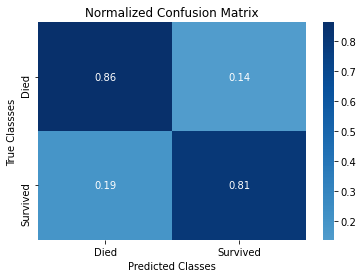

In [70]:
ax = sns.heatmap(cm, annot=True, center =0 , 
                 xticklabels=classes,yticklabels=classes,cmap='Blues')
ax.set(ylabel='True Classses',xlabel='Predicted Classes', 
       title='Normalized Confusion Matrix')

In [71]:
def plot_confusion_matrix(y_test,y_hat_test,normalize='true',
                         classes = ['Died','Survived']):
    
    cm = metrics.confusion_matrix(y_test,y_hat_test,normalize=normalize)
    ax = sns.heatmap(cm, annot=True, center =0 , 
                     
                 xticklabels=classes,yticklabels=classes,cmap='Blues')
    ax.set(ylabel='True Classses',xlabel='Predicted Classes', 
           title='Normalized Confusion Matrix')


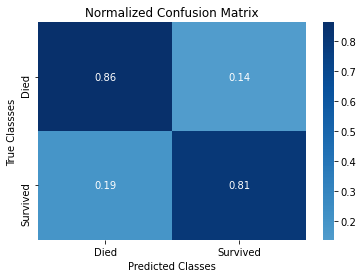

In [75]:
plot_confusion_matrix(y_test,y_hat_test)#,normalize=)

In [80]:
def evaluate_model(y_test,y_hat_test,normalize='true',
                         classes = ['Died','Survived']):
    dashes='---'*20
    print(dashes)
    print("\tCLASSIFICATION REPORT")
    print(dashes)
    print(metrics.classification_report(y_test,
                                        y_hat_test,
                                        target_names=classes))
    print(dashes)
    plot_confusion_matrix(y_test,y_hat_test,normalize=normalize,
                         classes=classes)

------------------------------------------------------------
	CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.89      0.86      0.88       116
    Survived       0.76      0.81      0.78        62

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.85      0.84      0.84       178

------------------------------------------------------------


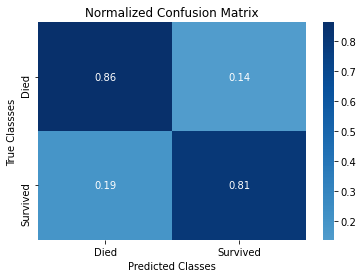

In [81]:
evaluate_model(y_test,y_hat_test)

# APPENDIX 

In [ ]:
def remake_df(array,df):
    return pd.DataFrame(array, columns=df.columns, index=df.index)

def fit_evaluate_model(linreg,X_train_sca, X_test_sca, y_train, y_test):
    linreg.fit(X_train_sca, y_train)

    y_hat_train = linreg.predict(X_train_sca)
    y_hat_test = linreg.predict(X_test_sca)

    return linreg

def get_model_coeffs(X_df, sklearn_model=None, ols_model = None):
    
    coeffs_df = pd.DataFrame()
    
    if sklearn_model is not None:

        coeffs = dict(zip(X_df.columns,sklearn_model.coef_))
        coeffs['const'] = sklearn_model.intercept_

        coeffs_df = pd.DataFrame(coeffs,index=['sklearn']).T

    if ols_model is not None:
        coeffs_df = coeffs_df.join(ols_model.params.rename('statsmodels'))
        coeffs_df = coeffs_df.join(ols_model.pvalues.rename('p-values').round(4))
        
    return coeffs_df